#IE-714: Course Project

##**A simple implementation of blockchain into supply chain**:


##Libraries:

In [ ]:
import copy #forking a chain
import datetime #get real time 
import hashlib #hashing
import random #For data generation
from timeit import default_timer as timer #To note time required to run the code
import pandas as pd #To create the database
import matplotlib.pyplot as plt #For plotting purpose

##Class representing a blockchain:

In [ ]:
class MinimalChain():
    def __init__(self): # initialize when creating a chain
        self.blocks = [self.get_genesis_block()]


    
    def __eq__(self, other):
        if isinstance(other, self.__class__):
            return self.__dict__ == other.__dict__
        else:
            return False
    
    def get_genesis_block(self): 
        return MinimalBlock(0, 
                            datetime.datetime.utcnow(), 
                            'Genesis', 
                            'arbitrary')
    
    def add_block(self, data):
        self.blocks.append(MinimalBlock(len(self.blocks), 
                                        datetime.datetime.utcnow(), 
                                        data, 
                                        self.blocks[len(self.blocks)-1].hash))
    
    def get_chain_size(self): # exclude genesis block
        return len(self.blocks)-1
    
    def verify(self, verbose=True): 
        flag = True
        for i in range(1,len(self.blocks)):
            if not self.blocks[i].verify(): # assume Genesis block integrity
                flag = False
                if verbose:
                    print(f'Wrong data type(s) at block {i}.')
            if self.blocks[i].index != i:
                flag = False
                if verbose:
                    print(f'Wrong block index at block {i}.')
            if self.blocks[i-1].hash != self.blocks[i].previous_hash:
                flag = False
                if verbose:
                    print(f'Wrong previous hash at block {i}.')
            if self.blocks[i].hash != self.blocks[i].hashing():
                flag = False
                if verbose:
                    print(f'Wrong hash at block {i}.')
            if self.blocks[i-1].timestamp >= self.blocks[i].timestamp:
                flag = False
                if verbose:
                    print(f'Backdating at block {i}.')
        return flag
    
    def fork(self, head='latest'):
        if head in ['latest', 'whole', 'all']:
            return copy.deepcopy(self) # deepcopy since they are mutable
        else:
            c = copy.deepcopy(self)
            c.blocks = c.blocks[0:head+1]
            return c
    
    def get_root(self, chain_2):
        min_chain_size = min(self.get_chain_size(), chain_2.get_chain_size())
        for i in range(1,min_chain_size+1):
            if self.blocks[i] != chain_2.blocks[i]:
                return self.fork(i-1)
        return self.fork(min_chain_size)

    def make_dataframe(self):
      index_array = []
      timestamp_array = []
      prev_hash_array = []
      hash_array = []
      source_array = []
      category_array = []
      product_id_array = []
      for block in self.blocks:
        index_array.append(block.index)
        timestamp_array.append(block.timestamp)
        prev_hash_array.append(block.previous_hash)
        hash_array.append(block.hash)
        source_array.append(block.source)
        category_array.append(block.category)
        product_id_array.append(block.product_id)

      df = pd.DataFrame({'Index':index_array, 'Time-stamp':timestamp_array, 'Source factory':source_array, 'Category of product':category_array, 'Product ID':product_id_array, 'Previous hash':prev_hash_array, 'Hash':hash_array})
      return df

    

##Class representing an individual block:

In [ ]:

class MinimalBlock():
    def __init__(self, index, timestamp, data, previous_hash):
        self.index = index
        self.timestamp = timestamp
        self.data = data
        self.previous_hash = previous_hash
        self.source = self.generate_source()
        self.category = self.generate_category()
        self.product_id = self.generate_product_id()
        self.hash = self.hashing()

    
    def __eq__(self, other):
        if isinstance(other, self.__class__):
            return self.__dict__ == other.__dict__
        else:
            return False
    
    def hashing(self):
        key = hashlib.sha256()
        key.update(str(self.index).encode('utf-8'))
        key.update(str(self.timestamp).encode('utf-8'))
        key.update(str(self.data).encode('utf-8'))
        key.update(str(self.previous_hash).encode('utf-8'))
        key.update(str(self.source).encode('utf-8'))
        key.update(str(self.category).encode('utf-8'))
        key.update(str(self.product_id).encode('utf-8'))
        return key.hexdigest()

    def generate_source(self):
        random_source = random.choice(["Zubeen's farm", "Abijith's farm", "Mayank's farm", "Chinmay's farm"])
        return random_source

    def generate_category(self):
        random_category = random.choice(["Fresh edible poultry meat", "Frozen edible poultry meat", "Eggs in shell", "Egg yolk dried"])
        return random_category

    def generate_product_id(self):
        product_id = str(self.timestamp)
        product_id = product_id.replace(':','')
        product_id = product_id.replace(' ','')
        product_id = product_id.replace('_','')
        product_id = product_id.replace('-','')
        product_id = product_id.replace('.','')
        return product_id

    def verify(self): # check data types of all info in a block
        instances = [self.index, self.timestamp, self.previous_hash, self.hash, self.source, self.category, self.product_id]
        types = [int, datetime.datetime, str, str,str,str,str]
        if sum(map(lambda inst_, type_: isinstance(inst_, type_), instances, types)) == len(instances):
            return True
        else:
            return False

##Creating a blockchain:

We are creating a blockchain where each individual block represents a product.

In [ ]:
c = MinimalChain() # Start a chain
number_of_blocks = 2000
for i in range(1,number_of_blocks +1):
    c.add_block(f'This is block {i} of my first chain.')

The details of each block, i.e. each product can be accessed from the  **Database**: 

In [ ]:
print(c.blocks[1].index)
print(c.blocks[2].source)
print(c.blocks[3].category)
print(c.blocks[4].timestamp)
print(c.blocks[5].hash)
print(c.blocks[6].product_id)

1
Chinmay's farm
Egg yolk dried
2021-05-12 03:40:34.785548
edd38d1b31948ceb75155a46bb11a64afd6c7cefe03ccdd7ba9c0b29c4060b78
20210512034034785594


##Database:

This is how the list looks

In [ ]:
detail_of_c = c.make_dataframe()
detail_of_c[['Product ID','Category of product','Source factory','Hash']]

,Product ID,Category of product,Source factory,Hash
0,20210512034034785250,Fresh edible poultry meat,Zubeen's farm,9000ca5235ab7058ec5b96864cb44e4c0ff581608dd74b...
1,20210512034034785457,Frozen edible poultry meat,Chinmay's farm,4ea82da83c644751b5d3c8bc6a61fca8aac52502e13ebb...
2,20210512034034785496,Frozen edible poultry meat,Chinmay's farm,8e29514bd8a42b9102225f97d05a716a59337b0407cb61...
3,20210512034034785524,Egg yolk dried,Mayank's farm,de3f4bf4959dbe09249b434b58f5e88eeea3054c174dc0...
4,20210512034034785548,Eggs in shell,Abijith's farm,f06b771f8e14701b35e78020be991af498da7856c3f1ae...
...,...,...,...,...
1996,20210512034034817956,Fresh edible poultry meat,Mayank's farm,e028cea6c13b7760a9f4d4e28bb82b7ee464aa1f8affe1...
1997,20210512034034817971,Fresh edible poultry meat,Zubeen's farm,c368554d5a5c74a8981bb04bd19d0f6e832b6541fedab1...
1998,20210512034034817991,Egg yolk dried,Mayank's farm,7b1648d80a4fd9b804b39f60f1cf4d277cc81f39e74d7e...
1999,20210512034034818007,Fresh edible poultry meat,Chinmay's farm,022acc1097d2538a606f6ade7888eabca9ee55b84a5147...


In [ ]:
detail_of_c

,Index,Time-stamp,Source factory,Category of product,Product ID,Previous hash,Hash
0,0,2021-05-12 03:40:34.785250,Zubeen's farm,Fresh edible poultry meat,20210512034034785250,arbitrary,9000ca5235ab7058ec5b96864cb44e4c0ff581608dd74b...
1,1,2021-05-12 03:40:34.785457,Chinmay's farm,Frozen edible poultry meat,20210512034034785457,9000ca5235ab7058ec5b96864cb44e4c0ff581608dd74b...,4ea82da83c644751b5d3c8bc6a61fca8aac52502e13ebb...
2,2,2021-05-12 03:40:34.785496,Chinmay's farm,Frozen edible poultry meat,20210512034034785496,4ea82da83c644751b5d3c8bc6a61fca8aac52502e13ebb...,8e29514bd8a42b9102225f97d05a716a59337b0407cb61...
3,3,2021-05-12 03:40:34.785524,Mayank's farm,Egg yolk dried,20210512034034785524,8e29514bd8a42b9102225f97d05a716a59337b0407cb61...,de3f4bf4959dbe09249b434b58f5e88eeea3054c174dc0...
4,4,2021-05-12 03:40:34.785548,Abijith's farm,Eggs in shell,20210512034034785548,de3f4bf4959dbe09249b434b58f5e88eeea3054c174dc0...,f06b771f8e14701b35e78020be991af498da7856c3f1ae...
...,...,...,...,...,...,...,...
1996,1996,2021-05-12 03:40:34.817956,Mayank's farm,Fresh edible poultry meat,20210512034034817956,958cf86ca481aeb31e30bdd01089c684472af45f6fbafa...,e028cea6c13b7760a9f4d4e28bb82b7ee464aa1f8affe1...
1997,1997,2021-05-12 03:40:34.817971,Zubeen's farm,Fresh edible poultry meat,20210512034034817971,e028cea6c13b7760a9f4d4e28bb82b7ee464aa1f8affe1...,c368554d5a5c74a8981bb04bd19d0f6e832b6541fedab1...
1998,1998,2021-05-12 03:40:34.817991,Mayank's farm,Egg yolk dried,20210512034034817991,c368554d5a5c74a8981bb04bd19d0f6e832b6541fedab1...,7b1648d80a4fd9b804b39f60f1cf4d277cc81f39e74d7e...
1999,1999,2021-05-12 03:40:34.818007,Chinmay's farm,Fresh edible poultry meat,20210512034034818007,7b1648d80a4fd9b804b39f60f1cf4d277cc81f39e74d7e...,022acc1097d2538a606f6ade7888eabca9ee55b84a5147...


##Verifying the Blockchain:


In [ ]:
start =  timer()
print(c.get_chain_size())
print(c.verify())
end  =  timer()
print("Time taken =",round(end-start,2),"sec")

2000
True
Time taken = 0.03 sec


In [ ]:
# print("\n\nBlockchain details:\n\n")
# for i in range(number_of_blocks):
#   print("DETAILS OF BLOCK",i+1)
#   print("Index of block: \t",c.blocks[i].index)
#   print("Timestamp: \t\t",c.blocks[i].timestamp)
#   print("Data from block: \t",c.blocks[i].data)
#   print("Source of the item: \t", c.blocks[i].source)
#   print("Type of the item: \t", c.blocks[i].category)
#   print("Hash of block: \t\t", c.blocks[i].hash,"\n\n")

##Forking:
Forking is a phenomenon when the current structure of blockchain is tampered and challenged. 

Here we are creating a forked chain named **c.forked** using the deepcopy function. If we try to change any data from the forked chain, the verify() function will immidiately detect the discrepancy and print it out. 

In [ ]:
start = timer()
c_forked = c.fork('latest')
end = timer()
print(c == c_forked)
print("Time taken for forking =",round(end-start),"sec")

True
Time taken for forking = 0 sec


In [ ]:
start = timer()
c_forked.verify()
end = timer()
print("Time taken to verify the forked blockchain =",round(end-start),"sec")

Time taken to verify the forked blockchain = 0 sec


In [ ]:
start = timer()
c_forked.add_block('New block for forked chain!')
end = timer()
print(c.get_chain_size(), c_forked.get_chain_size())
print("Time taken for adding a new block=",round(end-start,5),"sec")

2000 2001
Time taken for adding a new block= 0.00017 sec


In [ ]:
start_1 = timer()
c_forked = c.fork('latest')
end_1 = timer()
start_2 = timer()
print(c_forked.verify())
end_2 = timer()
print("Time taken to fork and tamper indices =",round(end_1-start_1),"sec")
print("Time taken to verify tampared blockchain =",round(end_2-start_2),"sec")

True
Time taken to fork and tamper indices = 0 sec
Time taken to verify tampared blockchain = 0 sec


In [ ]:
start = timer()
c_forked.verify()
end = timer()
print("Time taken =",round(end-start),"sec")

Time taken = 0 sec


In [ ]:
print("Verifying the blockchain...\nDiscrepancies found:\n")
start = timer()
c_forked = c.fork('latest')
c_forked.blocks[119].index = 129
c_forked.blocks[6].index = 5
c_forked.blocks[1345].index = 1354
c_forked.blocks[146].timestamp = datetime.datetime(2020, 6, 4, 0, 0, 0, 0)
c_forked.blocks[713].timestamp = datetime.datetime(2020, 5, 4, 0, 0, 0, 0)
c_forked.blocks[1579].timestamp = datetime.datetime(2020, 4, 4, 0, 0, 0, 0)
c_forked.verify()
end = timer()
print("\n(Time taken for verification = 10.45 sec)")

Verifying the blockchain...
Discrepancies found:

Wrong block index at block 6.
Wrong hash at block 6.
Wrong block index at block 119.
Wrong hash at block 119.
Wrong hash at block 146.
Backdating at block 146.
Wrong hash at block 713.
Backdating at block 713.
Wrong block index at block 1345.
Wrong hash at block 1345.
Wrong hash at block 1579.
Backdating at block 1579.

(Time taken for verification = 10.45 sec)


In [ ]:
start = timer()
c_forked.verify()
end = timer()
print("Time taken =",round(end-start),"sec")

Wrong block index at block 6.
Wrong hash at block 6.
Wrong block index at block 119.
Wrong hash at block 119.
Wrong hash at block 146.
Backdating at block 146.
Wrong hash at block 713.
Backdating at block 713.
Wrong block index at block 1345.
Wrong hash at block 1345.
Wrong hash at block 1579.
Backdating at block 1579.
Time taken = 0 sec


In [ ]:
start = timer()
c_forked = c.fork('latest')
c_forked.blocks[5].previous_hash = c_forked.blocks[1].hash
c_forked.verify()
end = timer()
print("Time taken =",round(end-start),"sec")

Wrong previous hash at block 5.
Wrong hash at block 5.
Time taken = 0 sec


In [ ]:
start = timer()
c_forked.verify()
end = timer()
print("Time taken =",round(end-start),"sec")

Wrong previous hash at block 5.
Wrong hash at block 5.
Time taken = 0 sec


##Random products Bought:
Let's order 10 different products of this supply chain from random places:

In [ ]:
print("The IDs of products I bought are: \n")
products_list = []
for i in range(10):
  n = random.randint(1,number_of_blocks)
  print(c.blocks[n].product_id)
  products_list.append(n)

The IDs of products I bought are: 

20210512034034807937
20210512034034789127
20210512034034810916
20210512034034800213
20210512034034794044
20210512034034808891
20210512034034795477
20210512034034794967
20210512034034787856
20210512034034803821


In [ ]:
products_bought  =  products_list

##Tracing the details of your product:

In [ ]:
count = 0

start = timer()

index_array = []
timestamp_array = []
prev_hash_array = []
hash_array = []
source_array = []
category_array = []
product_id_array = []

for number_of_block in range(len(c.blocks)):
  if c.blocks[number_of_block].index in products_bought:
    count += 1
    print("\nYour product",count,"details are:\n")
    print("\tProduct ID:\t\t",c.blocks[number_of_block].product_id)
    print("\tIndex of block: \t",c.blocks[number_of_block].index)
    print("\tTimestamp: \t\t",c.blocks[number_of_block].timestamp)
    print("\tSource of the item: \t", c.blocks[number_of_block].source)
    print("\tType of the item: \t", c.blocks[number_of_block].category)
    print("\tHash of block: \t\t", c.blocks[number_of_block].hash,"\n")

    index_array.append(c.blocks[number_of_block].index)
    timestamp_array.append(c.blocks[number_of_block].timestamp)
    prev_hash_array.append(c.blocks[number_of_block].previous_hash)
    hash_array.append(c.blocks[number_of_block].hash)
    source_array.append(c.blocks[number_of_block].source)
    category_array.append(c.blocks[number_of_block].category)
    product_id_array.append(c.blocks[number_of_block].product_id)

    your_product_details = pd.DataFrame({'Index':index_array, 'Time-stamp':timestamp_array, 'Previous hash':prev_hash_array, 'Hash':hash_array, 'Source factory':source_array, 'Category of product':category_array, 'Product ID':product_id_array})


end = timer()

print("IT TOOK",round(end-start,2),"SEC TO DETECT ALL THE PRODUCTS' DETAILS!")


Your product 1 details are:

	Product ID:		 20210512034034787856
	Index of block: 	 79
	Timestamp: 		 2021-05-12 03:40:34.787856
	Source of the item: 	 Chinmay's farm
	Type of the item: 	 Fresh edible poultry meat
	Hash of block: 		 f6415386802f97c358e5f01d9749789a92ff027e04f35d5076dbc29c30d117cf 


Your product 2 details are:

	Product ID:		 20210512034034789127
	Index of block: 	 126
	Timestamp: 		 2021-05-12 03:40:34.789127
	Source of the item: 	 Zubeen's farm
	Type of the item: 	 Eggs in shell
	Hash of block: 		 adc813dab736484f12444666fbe9e8630f141ee242de680643ff4c1d01051cf0 


Your product 3 details are:

	Product ID:		 20210512034034794044
	Index of block: 	 331
	Timestamp: 		 2021-05-12 03:40:34.794044
	Source of the item: 	 Zubeen's farm
	Type of the item: 	 Frozen edible poultry meat
	Hash of block: 		 9c8eff35aa2a2e98f6f479ee8f8fbe4a9c75f069575942f39592ffbb95d2545a 


Your product 4 details are:

	Product ID:		 20210512034034794967
	Index of block: 	 388
	Timestamp: 		 2021

##These are the details of your purchase:

In [ ]:
print("The details of the products you bought are traced as follows:")
print("Found in",round(end-start,3),"sec")
pd.DataFrame(your_product_details[['Index','Product ID','Time-stamp','Source factory','Category of product']])

The details of the products you bought are traced as follows:
Found in 0.03 sec


,Index,Product ID,Time-stamp,Source factory,Category of product
0,79,20210512034034787856,2021-05-12 03:40:34.787856,Chinmay's farm,Fresh edible poultry meat
1,126,20210512034034789127,2021-05-12 03:40:34.789127,Zubeen's farm,Eggs in shell
2,331,20210512034034794044,2021-05-12 03:40:34.794044,Zubeen's farm,Frozen edible poultry meat
3,388,20210512034034794967,2021-05-12 03:40:34.794967,Abijith's farm,Egg yolk dried
4,424,20210512034034795477,2021-05-12 03:40:34.795477,Zubeen's farm,Frozen edible poultry meat
5,755,20210512034034800213,2021-05-12 03:40:34.800213,Mayank's farm,Fresh edible poultry meat
6,1013,20210512034034803821,2021-05-12 03:40:34.803821,Chinmay's farm,Eggs in shell
7,1301,20210512034034807937,2021-05-12 03:40:34.807937,Chinmay's farm,Frozen edible poultry meat
8,1370,20210512034034808891,2021-05-12 03:40:34.808891,Zubeen's farm,Egg yolk dried
9,1504,20210512034034810916,2021-05-12 03:40:34.810916,Chinmay's farm,Fresh edible poultry meat


###Analysis of number of blocks vs time:

In [ ]:
nob_values =  [10000,25000,50000,100000,250000,500000,1000000]
nob_values_2 = [1000000,2500000,5000000,10000000,25000000,50000000]

In [ ]:
time_to_create_fork =  []
time_to_verify_chain = []
time_to_trace_items = []
product_purchased_dataframes = []

for number_of_blocks in nob_values:
  print("\n\nFOR",number_of_blocks,"BLOCKS/PRODUCTS:\n")
  chain = MinimalChain()
  for i in range(1,number_of_blocks +1):
    chain.add_block('This block belongs to chain')
  
  start = timer()
  counter_chain = chain.fork('latest')
  end = timer ()
  print("Counter chain comparison status with original chain: ", chain == counter_chain)
  print("Time taken to fork the chain = ",round(end-start,2),"sec")
  time_to_create_fork.append(round(end-start,4))

  start = timer()
  counter_chain.blocks[9].index = -9 
  counter_chain.blocks[5].previous_hash = counter_chain.blocks[2].hash
  counter_chain.blocks[16].timestamp = datetime.datetime(2020, 6, 4, 0, 0, 0, 0)
  counter_chain.blocks[17].timestamp = datetime.datetime(2020, 5, 4, 0, 0, 0, 0)
  counter_chain.blocks[18].timestamp = datetime.datetime(2020, 4, 4, 0, 0, 0, 0)
  counter_chain.verify()
  end = timer()
  time_to_verify_chain.append(round(end-start,2))
  print("Time to verify the counter chain =",round(end-start,4),"sec.")

for number_of_blocks in nob_values:
  print("\n\nFOR",number_of_blocks,"BLOCKS/PRODUCTS:\n")
  chain = MinimalChain()
  for i in range(1,number_of_blocks +1):
    chain.add_block('This block belongs to chain')
  
 
  start = timer()

  index_array = []
  timestamp_array = []
  prev_hash_array = []
  hash_array = []
  source_array = []
  category_array = []
  product_id_array = []

  for number_of_block in range(len(c.blocks)):
    if c.blocks[number_of_block].index in products_bought:
      count += 1
      index_array.append(c.blocks[number_of_block].index)
      timestamp_array.append(c.blocks[number_of_block].timestamp)
      prev_hash_array.append(c.blocks[number_of_block].previous_hash)
      hash_array.append(c.blocks[number_of_block].hash)
      source_array.append(c.blocks[number_of_block].source)
      category_array.append(c.blocks[number_of_block].category)
      product_id_array.append(c.blocks[number_of_block].product_id)

      your_product_details = pd.DataFrame({'Index':index_array, 'Time-stamp':timestamp_array, 'Previous hash':prev_hash_array, 'Hash':hash_array, 'Source factory':source_array, 'Category of product':category_array, 'Product ID':product_id_array})
  
  product_purchased_dataframes.append(your_product_details)
  end = timer()
  time_to_trace_items.append(round(end-start,4))
  print("Time taken to trace the items =",round(end-start,2),"sec.")







FOR 10000 BLOCKS/PRODUCTS:

Counter chain comparison status with original chain:  True
Time taken to fork the chain =  0.26 sec
Wrong previous hash at block 5.
Wrong hash at block 5.
Wrong block index at block 9.
Wrong hash at block 9.
Wrong hash at block 16.
Backdating at block 16.
Wrong hash at block 17.
Backdating at block 17.
Wrong hash at block 18.
Backdating at block 18.
Time to verify the counter chain = 0.1177 sec.


FOR 25000 BLOCKS/PRODUCTS:

Counter chain comparison status with original chain:  True
Time taken to fork the chain =  0.61 sec
Wrong previous hash at block 5.
Wrong hash at block 5.
Wrong block index at block 9.
Wrong hash at block 9.
Wrong hash at block 16.
Backdating at block 16.
Wrong hash at block 17.
Backdating at block 17.
Wrong hash at block 18.
Backdating at block 18.
Time to verify the counter chain = 0.2906 sec.


FOR 50000 BLOCKS/PRODUCTS:

Counter chain comparison status with original chain:  True
Time taken to fork the chain =  1.39 sec
Wrong previo

NameError: ignored

In [ ]:
time_to_trace_items = []
product_purchased_dataframes = []

for number_of_blocks in nob_values_2:
  print("\n\nFOR",number_of_blocks,"BLOCKS/PRODUCTS:\n")
  chain = MinimalChain()
  for i in range(1,number_of_blocks +1):
    chain.add_block('This block belongs to chain')
  

 
  start = timer()

  index_array = []
  timestamp_array = []
  prev_hash_array = []
  hash_array = []
  source_array = []
  category_array = []
  product_id_array = []

  for number_of_block in range(len(chain.blocks)):
    if chain.blocks[number_of_block].index in products_bought:
      count += 1
      index_array.append(chain.blocks[number_of_block].index)
      timestamp_array.append(chain.blocks[number_of_block].timestamp)
      prev_hash_array.append(chain.blocks[number_of_block].previous_hash)
      hash_array.append(chain.blocks[number_of_block].hash)
      source_array.append(chain.blocks[number_of_block].source)
      category_array.append(chain.blocks[number_of_block].category)
      product_id_array.append(chain.blocks[number_of_block].product_id)

      your_product_details = pd.DataFrame({'Index':index_array, 'Time-stamp':timestamp_array, 'Previous hash':prev_hash_array, 'Hash':hash_array, 'Source factory':source_array, 'Category of product':category_array, 'Product ID':product_id_array})
  
  product_purchased_dataframes.append(your_product_details)
  end = timer()
  time_to_trace_items.append(round(end-start,4))
  print("Time taken to trace the items =",round(end-start,4),"sec.")






FOR 1000000 BLOCKS/PRODUCTS:

Time taken to trace the items = 0.3712 sec.


FOR 2500000 BLOCKS/PRODUCTS:

Time taken to trace the items = 0.9595 sec.


FOR 5000000 BLOCKS/PRODUCTS:

Time taken to trace the items = 1.875 sec.


FOR 10000000 BLOCKS/PRODUCTS:

Time taken to trace the items = 3.6238 sec.


FOR 25000000 BLOCKS/PRODUCTS:



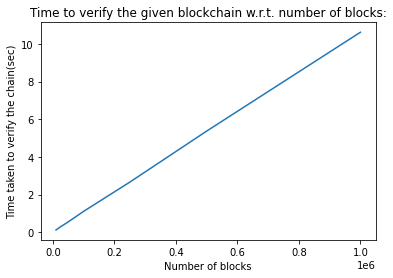

In [ ]:
plt.plot(nob_values, time_to_verify_chain)
#plt.plot(nob_values, time_to_trace_items)
plt.title('Time to verify the given blockchain w.r.t. number of blocks:')
plt.xlabel('Number of blocks')
plt.ylabel('Time taken to verify the chain(sec)')
plt.show()

In [ ]:
time_to_trace_items = [0.3712, 0.9595, 1.875, 3.6238, 9.2514, 19.0328]

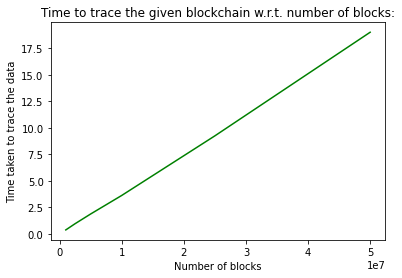

In [ ]:
plt.plot(nob_values_2, time_to_trace_items, color = 'green')
#plt.plot(nob_values, time_to_trace_items)
plt.title('Time to trace the given blockchain w.r.t. number of blocks:')
plt.xlabel('Number of blocks')
plt.ylabel('Time taken to trace the data')
plt.show()